In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression




In [3]:
# Read the data
df = pd.read_csv('Churn_Modelling[1].csv')

In [4]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [6]:
df.shape

(10000, 14)

In [7]:
print(df['Exited'])

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [8]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Encoding categorical variables

We start with dropping the target column and those columns which wont be useful in model building.

In [9]:
X = df.drop(['RowNumber','CustomerId','Surname','Exited'], axis=1)
y = df['Exited']



Now seperate the categorical and numerical columns before one hot encoding

In [10]:
categorical_cols = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']
numeric_cols = [col for col in X.columns if col not in categorical_cols]


In [11]:
enc = OneHotEncoder(drop='first', sparse_output=False)
categ = enc.fit_transform(X[categorical_cols])


In [12]:
X_num = X[numeric_cols].values
X_final = np.hstack((X_num, categ))


Splitting The data before Model Building

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


 Standardising numeric features

In [14]:
scaler = StandardScaler()
X_train[:, :len(numeric_cols)] = scaler.fit_transform(X_train[:, :len(numeric_cols)])
X_test[:, :len(numeric_cols)] = scaler.transform(X_test[:, :len(numeric_cols)])


Model Building

In [15]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [16]:
#Prediction
y_pred = log_model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test.values,'Predicted': y_pred})
comparison.head()



,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


Evaluation

Accuracy: 0.843

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1607
           1       0.69      0.36      0.48       393

    accuracy                           0.84      2000
   macro avg       0.78      0.66      0.69      2000
weighted avg       0.83      0.84      0.82      2000



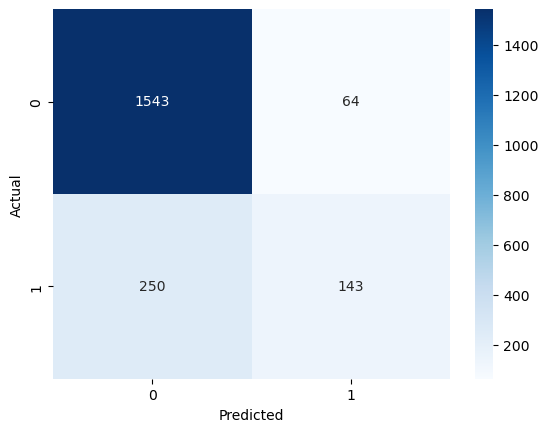

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ROC Curve

ROC AUC Score: 0.8371342931924738


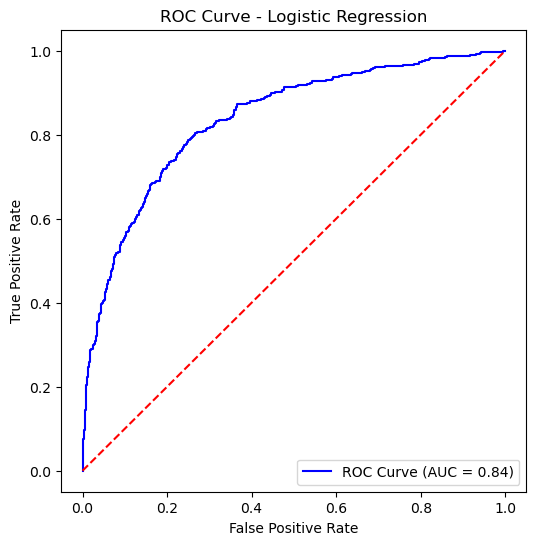

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = log_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)


plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

Model Building: Random Forest

In [19]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.77      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



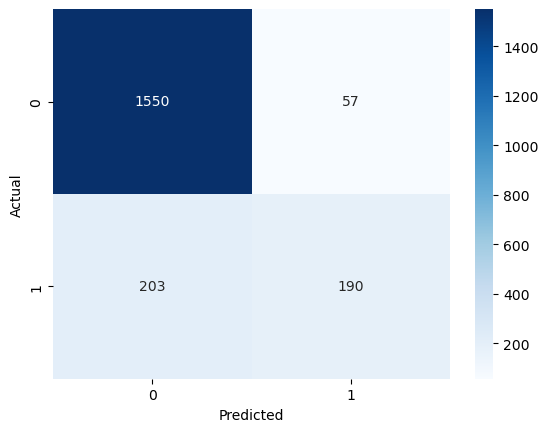

In [20]:
y_pred = model.predict(X_test)

#Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Comparison between the results of random forest and logistic regression

In [22]:


# --- Random Forest evaluation ---
randmf_y_pred = model.predict(X_test)              # assuming randmf_model is your RandomForestClassifier
randmf_y_prob = model.predict_proba(X_test)[:,1]

randmf_results = {
    "Accuracy": accuracy_score(y_test, randmf_y_pred),
    "Precision": precision_score(y_test, randmf_y_pred),
    "Recall": recall_score(y_test, randmf_y_pred),
    "F1-score": f1_score(y_test, randmf_y_pred),
    "ROC AUC": roc_auc_score(y_test, randmf_y_prob)
}

# --- Logistic Regression evaluation ---
lr_y_pred = log_model.predict(X_test)               # assuming log_reg is your LogisticRegression
lr_y_prob = log_model.predict_proba(X_test)[:,1]

lr_results = {
    "Accuracy": accuracy_score(y_test, lr_y_pred),
    "Precision": precision_score(y_test, lr_y_pred),
    "Recall": recall_score(y_test, lr_y_pred),
    "F1-score": f1_score(y_test, lr_y_pred),
    "ROC AUC": roc_auc_score(y_test, lr_y_prob)
}

# --- Combine into DataFrame for side-by-side view ---
comparison = pd.DataFrame([randmf_results, lr_results], index=["Random Forest","Logistic Regression"])
print(comparison)

                     Accuracy  Precision    Recall  F1-score   ROC AUC
Random Forest           0.870   0.769231  0.483461  0.593750  0.862033
Logistic Regression     0.843   0.690821  0.363868  0.476667  0.837134
